In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_boston

In [3]:
boston  = load_boston()

In [143]:
X = boston.data
y = boston.target

In [146]:
ones = np.ones([X.shape[0],1])
X = np.concatenate((ones,X),axis=1)

In [149]:
from sklearn.preprocessing import StandardScaler

In [150]:
sc = StandardScaler()
X = sc.fit_transform(X)

In [151]:
y = y.reshape(-1,1)

In [152]:
sc1 = StandardScaler()
y = sc1.fit_transform(y)

In [153]:
def hypothesis(x,theta):
    sum_ = 0.0
    m = x.shape[0]
    for i in range(m):
        sum_ += (x[i]*theta[i])
    return sum_

In [155]:
def errorFunction(X,Y,theta):
    error = 0.0
    m = X.shape[0]
    for i in range(m):
        hx = hypothesis(X[i],theta)
        error += ((hx-Y[i])**2)
    return 0.5*error

In [156]:
def Gradient(X,Y,theta):
    m=X.shape[0]
    n=X.shape[1]
    grad = np.zeros((n,))
    for i in range(n):
        for j in range(m):
            hx = hypothesis(X[j],theta)
            grad[i] += ( (hx-Y[j]) * X[j][i] )
    return grad

In [172]:
def GradientDescent(X,Y,LearningRate = 0.0001):
    m=X.shape[0]
    n=X.shape[1]
    theta = np.zeros((n,))
    error = []
    itr = 0
    no_of_itr = 300
    while itr<=no_of_itr:
        error1 = errorFunction(X,Y,theta)
        error.append(error1)
        
        grad = Gradient(X,Y,theta)
        
        
        for i in range(n):
            theta[i] = theta[i] - LearningRate*grad[i]
        
        itr +=1
        
    return theta,error

In [173]:
theta, error = GradientDescent(X,y)

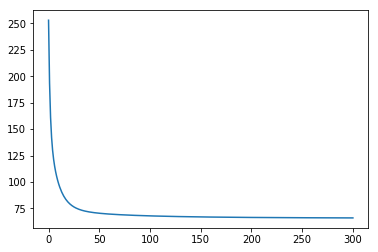

In [174]:
plt.plot(error)